In [1]:
import numpy as np
import gym
import math
import torch as T
import random
from sac_trader import SAC_Trader
from sac_trader2 import SAC_Trader2
from sac_agent import SAC_Agent
import time

In [2]:
s0 = 100 # initial mid-price

T = 1 # terminal time

sigma = 2 # volatility

gamma = 0.1 # risk aversion parameter

k = 1.5 # k = alpha*K and this is determined by the market order size

A = 140 # scaling factor that depends on frequency  of market buy or sell orders and market order size

N_prices = 2000

dt = 1/ N_prices # time step

In [3]:
agent = SAC_Agent([2])

trader = SAC_Trader2(sigma, A, k, dt, agent)

In [4]:
train_start = time.time()
epochs_start = time.time()

epoch_num = 1

train_rewards = np.empty(shape=epoch_num)
for epoch in range(epoch_num):

    bid = np.empty(shape=1)  # ask quoted by strategy
    ask = np.empty(shape=1)  # bid quoted by str.
    
    s = np.zeros(N_prices)
    s[0] = s0
    W = np.random.normal(0, np.sqrt(dt), N_prices)
    for i in range(1, N_prices):
        ds = sigma * W[i-1]
        s[i] = s[i-1] + ds

    # simulation loop, training logic is inside get_quotes
    for i in range(N_prices):
        Bid, Ask = trader.get_bid_ask(N_prices - i*dt, s[i], trainMode=True)
        # print("s: ", s[i], "Bid: ", Bid, "Ask: ", Ask)
        trader.interact_with_market(Bid, Ask, s[i])

        print()


    # save cumulative reward for epoch
    train_rewards[epoch] = trader.reward_total

    print(train_rewards[epoch])

    # finish training epoch
    trader.reset()


explore:  True
counter:  0 memory_size:  50000
s:  100.0 inventory:  0 sigma:  2 action:  [0.52356235] risk:  [0.00761781] timeleft:  200.0 res_price:  [100.]
Bid, Ask:  (array([96.28789576]), array([103.71210424]))
0

here
explore:  True
counter:  1 memory_size:  50000
s:  100.3298518067228 inventory:  0 sigma:  2 action:  [0.9290061] risk:  [0.00964503] timeleft:  199.995 res_price:  [100.32985181]
Bid, Ask:  (array([95.80740359]), array([104.85230002]))
0.0

here
explore:  True
counter:  2 memory_size:  50000
s:  100.47160808822451 inventory:  0 sigma:  2 action:  [0.41007791] risk:  [0.00705039] timeleft:  199.99 res_price:  [100.47160809]
Bid, Ask:  (array([96.98648847]), array([103.95672771]))
0.0

here
explore:  True
counter:  3 memory_size:  50000
s:  100.54506334333469 inventory:  0 sigma:  2 action:  [0.5182581] risk:  [0.00759129] timeleft:  199.985 res_price:  [100.54506334]
Bid, Ask:  (array([96.84378949]), array([104.24633719]))
0.0

here
explore:  True
counter:  4 memory

C:\Users\dusan\AppData\Local\Temp\ipykernel_11136\3654353309.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_rewards[epoch] = trader.reward_total


AttributeError: type object 'SAC_Trader' has no attribute 'Ask'

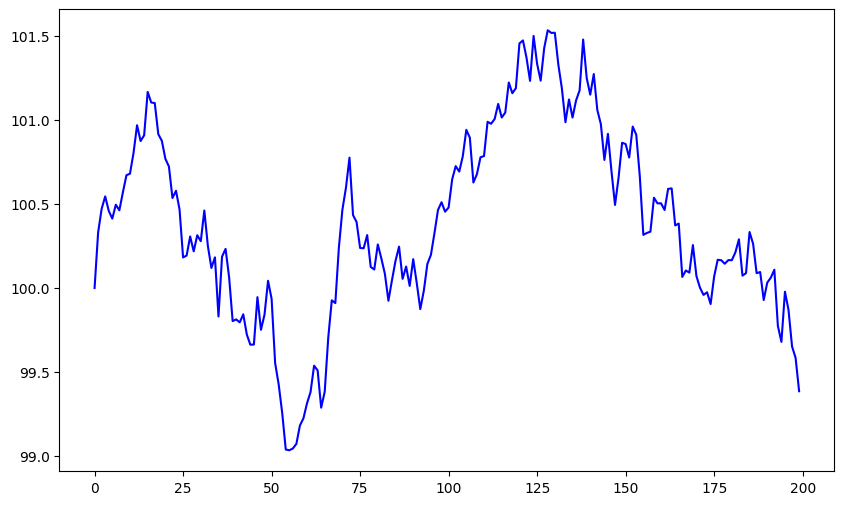

In [5]:
import matplotlib.pyplot as plt
# Plot the data
plt.figure(figsize=(10, 6))

# Plot s in blue
plt.plot(s, label='s', color='blue')

# Plot SAC_Trader.Ask in green
plt.plot(SAC_Trader.Ask, label='SAC_Trader.Ask', color='green')

# Plot SAC_Trader.Bid in red
plt.plot(SAC_Trader.Bid, label='SAC_Trader.Bid', color='red')

# Set labels and title
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Plot of s, SAC_Trader.Ask, and SAC_Trader.Bid')
plt.legend()

# Show the plot
plt.show()


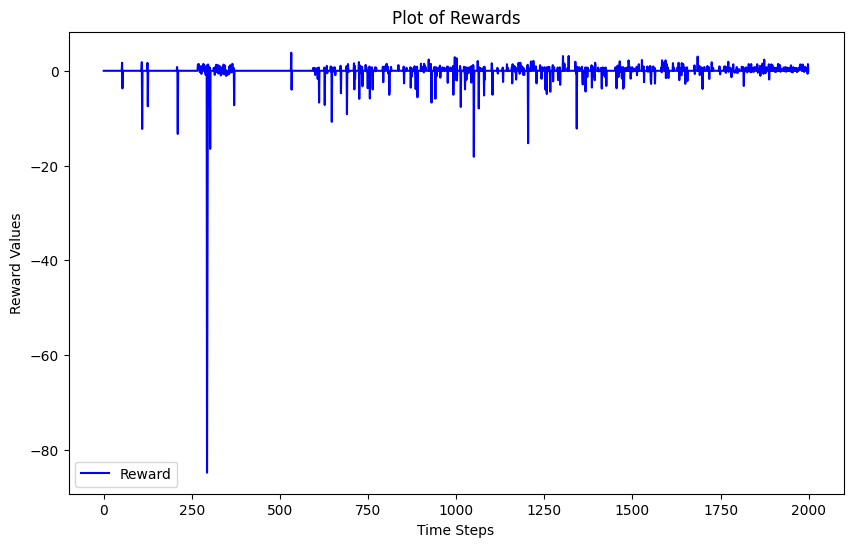

In [ ]:
import matplotlib.pyplot as plt
cumulative_reward = np.cumsum(SAC_Trader.reward)


# Plot the data
plt.figure(figsize=(10, 6))

# Plot cumulative reward in purple (choose your color)
# plt.plot(SAC_Trader.inventory, label='Cumulative Reward', color='purple')
plt.plot(SAC_Trader.reward, label='Reward', color='blue')

# Set labels and title
plt.xlabel('Time Steps')
plt.ylabel('Reward Values')
plt.title('Plot of Rewards')
plt.legend()

# Show the plot
plt.show()
